University of Stirling<br>
Author: John Poole (ID: 2636515)
#### CSCU9YE - Artificial Intelligence<br>

# Notebook 2 - Clustering-based algorithm (30%)

## K-means clustering 

I chose to implement k-means clustering for my cluster-based algorithm. The k-means algorithm is iterative and splits the dataset into a K number of pre-defined groups  known as clusters. It will be implemented by using the scikit-learn library. K-means is relatively simple to implement through this library making it an effective algorithm for this optimisation problem. It also guarantees convergence and can be scaled to large data sets. All these characteristics make it an efficient clustering algorithm to implement. 

### Reading the data file

In [14]:
import random as rnd
import numpy as np # Numerical library, used keeing the list of colours and computing the Euclidean distance
import pandas as pd 

# Read in the color data file 
# Input: string with file name
# Oputput: the number of colours (integer), and a list numpy arrays with all the colours
def read_data(fname):
    cols = np.loadtxt(fname, skiprows = 4) # The first 4 lines have text information, and are ignored     
    ncols = len(cols)     # Total number of colours and list of colours
    return ncols,cols

#### 100 Colour dataset

In [13]:
ncolors, colors = read_data("col100.txt") 

#### 500 Colour dataset

In [15]:
ncolors, colors = read_data("col500.txt")

### Plotting a sequence of colours

In [16]:
import matplotlib.pyplot as plt

# Dsiplay the colors as a strip of color bars
# Input: list of colors, order of colors, and height/ratio

def plot_colors(col_list, col_order, ratio = 10): 
    assert len(col_list) == len(col_order)
    img = np.zeros((ratio, len(col_list), 3))
    for i in range(0, len(col_list)):
        img[:, i, :] = col_list[col_order[i]]
    fig, axes = plt.subplots(1, figsize=(10,6)) # figsize=(width,height) handles window dimensions
    axes.imshow(img, interpolation='nearest')
    axes.axis('off')
    plt.show()

### Evaluation function to approximate the quality of the cluster based ordering solutions 

In [17]:
# This is an auxiliary function. It calculate the Euclidean distance between two individual colours
# Input: v and u as to be numpy arrays, vectors of real numbers with the RGB coordinates.

def euclid(v, u):
    return np.linalg.norm(v - u)

# Evaluation function.  Measures the quality of a given solution (ordering of colours) 
# The function computes the sum of the distances between all consecutive colours in the ordering
# Input: cols: list of colours 
#        ordc: ordering of colours
# Output: real number with the sumf of pair-wise differences in the colour ordering

def evaluate(cols, ordc):     
    adjacentColPairs = [[cols[ordc[i]],cols[ordc[i-1]]] for i in range(1,len(ordc))]
    return sum([euclid(i[1], i[0]) for i in adjacentColPairs])

### Data preprocessing

In [18]:
# Standardise the data to normal distribution
from sklearn import preprocessing

data_scaled = preprocessing.scale(colors)   # This produces a matrix with the scaled data.
data_scaled = pd.DataFrame(data_scaled)   # We transform it to a data frame for clustering

#### Solution - Colour size 100


cl_best100: [84 30 50 94 85 90 87  9 61 78  4 28 43 65 45 37 25 40 20 36 53 14 13 12
 56 91  7  5 70 76 33 38 47 54 69 77 52 34 67  1 88 86 21 26 16 29 68 22
 66 39  2 93 62 71 74 23 11 55 82 41 19 79 49 48 27 72 81 92 75  0 32  8
 10 17 18 24 31 35 42 95 46 51 58 44 80 64 83 57 73 15 89 59 60  6  3 63]

Objective Function: 37.38726692498186

Color Band:


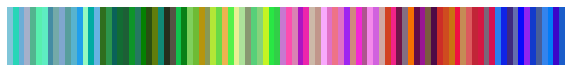

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) # K-means algorithm with parameters
clusters = kmeans.fit_predict(data_scaled) # compute cluster centres and predict cluster

data_scaled['3'] = clusters  # New column labelled '3' which represents the cluster assigned to each colour
ordered_clusters = data_scaled.sort_values(by='3') # Ordering colours according to their cluster membership
cl_best100 = ordered_clusters.index.values # extracting the ordered cluster values for visualisation in the colour band 

print('\ncl_best100:', cl_best100)
print('\nObjective Function:', evaluate(colors,cl_best100))
print('\nColor Band:')
plot_colors(colors, cl_best100)

#### Solution - Colour size 500


cl_best500: [169 448 386  97 451 244  90  87  85  84 383  78 259 459 261 263 375 373
  65 272  61 369 107 110 229 227 339 408 178 422 150 149 146 145 184 186
 279 191 135 198 130 210 120 118 223 225 114 390 140 280 413 326  37 296
 481   9  43 335  45  26 340 493   4 367  30  28 492 475  50 324 441 346
 224 230 315 313 308 218 109 347 391 468 127 160 419   3 153 179 407   6
 126 331 136 327 134 486 203 477 207 403 236 232 266  64 168 295  63 380
  60  59 354 362  89 246  57 101 305 371 452  73 292 287 240 274  80 190
 332 239 183 406 329 363 275 410 282 368 268 336 294 400 234 388 242 243
 306 245 353 248 300 345 358 249 297 217 325 209 257 206 395 264 376 195
 255   0  51 139  18  31 137 133 482 433 474 455 435 457 436  95  98 440
  35 105  24 467 442 116 443  92 141 444 158 418 423  58 471  46 464 470
  44  10 489  72 460  75 147 156 102 357 458  56 466  53  32  33 231 365
 453 258  91 270 374  83 456 416 462 291  70  36 253 338  25 389 343  17
 187 430 485  13 148 319  12 177 341 1

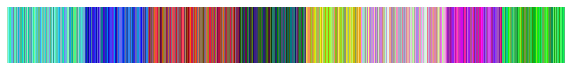

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) # K-means algorithm with parameters
clusters = kmeans.fit_predict(data_scaled) # compute cluster centres and predict cluster

data_scaled['3'] = clusters  # New column labelled '3' which represents the cluster assigned to each colour
ordered_clusters = data_scaled.sort_values(by='3') # Ordering colours according to their cluster membership
cl_best500 = ordered_clusters.index.values # extracting the ordered cluster values for visualisation in the colour band 

print('\ncl_best500:', cl_best500)
print('\nObjective Function:', evaluate(colors,cl_best500))
print('\nColor Band:')
plot_colors(colors, cl_best500, 50)

### Experiments

<b>cl_best100:</b> 6 Cluster Groups
<br>
<b>cl_best500:</b> 8 Cluster Groups
<br>
<br>
I chose these cluster sizes for both 100 and 500 colours because during my experimentation they produced the most visually appealing colour bands. They also both produced a relatively low evaluation values.  The experimentation for both datasets consisted of trying different cluster sizes and altering the other KMeans parameters to produce the results seen above. I tried different cluster sizes between the range of 1 and 20 as any sizes above this cluster range started to produce less appealing colour bands.